#Author: Francois Role <francois.role@gmail.com>

In [1]:
%load_ext autoreload

%autoreload 2

The following example also illustrates how to use the `coclust.io.data_loading`module the `coclust.visualization`module

0.9200056934846922
MODULARITY: 0.40857047426854338184


/home/frole/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


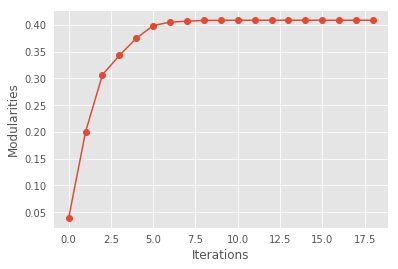

TypeError: plot_cluster_top_terms() missing 4 required positional arguments: 'in_data', 'all_terms', 'nb_top_terms', and 'model'

In [8]:
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from coclust.io.data_loading import load_doc_term_data
from coclust.coclustering import CoclustFuzzyMod
from coclust.visualization import (plot_cluster_top_terms,
                                   plot_convergence)


# read data
path = '../datasets/classic3_coclustFormat.mat'
doc_term_data = load_doc_term_data(path)
X = doc_term_data['doc_term_matrix']
true_doc_labels = doc_term_data['doc_labels']

# process
model = CoclustFuzzyMod(n_clusters=3, random_state=18)
model.fit(X)

# evaluate
predicted_doc_labels = model.row_labels_
print(nmi(true_doc_labels, predicted_doc_labels))

# Plot modularities
print("MODULARITY: %s" % model.modularity)
plot_convergence(model.modularities, "Modularities")

# Plot top terms
plot_cluster_top_terms()